**Grocery Auction**

## column info

값 | 의미
---|:---:|
`prd` | 품목명, 카테고리별로 전처리 |
`scale` | 판매 단위 (kg) |
`price` | 판매 가격 (₩) |
`reg_date` | 등록일 |
`eco` | 친환경 표기* |
`new_class` | 상품 등급 (1~9)|
`price_kg` | kg 당 가격 |
`state` | 도단위, 해외는 수입으로 표기|
`city` | 시단위, 해외는 국가명 |


- *(eco)친환경 표기 설명

값 | 의미
---|:---:|
`normal` | 일반 |
`low` | 저농약 |
`ecofriendly` | 무농약 |
`organic` | 유기농 |
`good_prd` | 우수농산물 |
`certified` | 품질인증 |
`ing` | 전환기 (유기농으로 전환중)|
`safe` | 산지안전성|

## Initialize

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import re
pd.options.display.float_format = '{:.5f}'.format
data = "/Users/luci031/Desktop/Coding/g_auction"

# matplotlib 폰트설정
plt.rc('font', family='AppleGothic') # For MacOS
# plt.rc('font', family='NanumGothic') # For Windows
print(plt.rcParams['font.family'])

%matplotlib inline
# 브라우저에서 바로 이미지를 그린다.

plt.rcParams['axes.unicode_minus'] = False

['AppleGothic']


In [2]:
# 데이터 불러오기
# df_lst = []

# for i in range(17,23):
#     if i < 22: df_name = "auction_20"+str(i)
#     else: df_name = "auction_202201_10"
#     name = pd.read_parquet(data+"/data_ingredients/"+df_name+".parquet")
#     print(len(name))
#     df_lst.append(name)


# for df in df_lst:
#     df.reset_index(inplace=True,drop=True)
#     if 'Unnamed: 0' in df.columns:
#         df.drop(columns=['Unnamed: 0'],inplace=True)

# df = df_lst[0]
# for dfs in df_lst[1:]:
#     df = pd.concat([df,dfs])
# df.reset_index(inplace=True,drop=True)

85546
174318
302292
228980
297634
417837


In [3]:
df = pd.read_parquet("/Users/luci031/Desktop/Coding/g_auction/data_ingredients/auction_total.parquet")
df_org = pd.read_csv("/Users/luci031/Desktop/Coding/g_auction/data_origin/auction_202002.csv",encoding='euc_kr')

In [24]:
a = df_org[(df_org['품목명'].str.contains('갓')) & (df_org['입력일']==20200213)].reset_index(drop=True)
a

,품목명,단위,등급,가격,산지,친환경구분,입력일
0,[갓]돌갓,8kg,특(1등),10100,경기 포천시,일반,20200213
1,[갓]돌갓,8kg,특(1등),9500,경기 포천시,일반,20200213
2,[갓]갓,10kg,특(1등),11000,전남 무안군,일반,20200213
3,[갓]갓,10kg,특(1등),13000,전남 무안군,일반,20200213


In [25]:
b = df[(df['prd']=='갓') & (df['reg_date']==dt.datetime(2020,2,13))].reset_index(drop=True)
b

,prd,scale,price,eco,reg_date,new_class,price_kg,state,city
0,갓,8.00000,10100,normal,2020-02-13,1,1262.50000,경기,포천
1,갓,8.00000,9500,normal,2020-02-13,1,1187.50000,경기,포천
2,갓,10.00000,11000,normal,2020-02-13,1,1100.00000,전남,무안
3,갓,10.00000,13000,normal,2020-02-13,1,1300.00000,전남,무안


In [42]:
c = pd.DataFrame()
c['scale'] = b['scale']
c['price'] = b['price']
c['price_kg'] = b['price_kg']
c

,scale,price,price_kg
0,8.00000,10100,1262.50000
1,8.00000,9500,1187.50000
2,10.00000,11000,1100.00000
3,10.00000,13000,1300.00000


In [3]:
df.to_csv('auction_total.csv')

In [40]:
# 보기 옵션
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 30)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1874370 entries, 280 to 28135793
Data columns (total 9 columns):
 #   Column     Dtype         
---  ------     -----         
 0   prd        object        
 1   scale      float64       
 2   price      int64         
 3   eco        object        
 4   reg_date   datetime64[ns]
 5   new_class  int64         
 6   price_kg   float64       
 7   state      object        
 8   city       object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 143.0+ MB


In [42]:
df.describe()

,scale,price,new_class,price_kg
count,1874370.00000,1874370.00000,1874370.00000,1874370.00000
mean,9.95955,20164.10420,1.26399,2200.69574
std,51.62496,61539.12996,0.88269,6866.84812
min,0.10000,500.00000,1.00000,14.29000
25%,5.00000,6500.00000,1.00000,900.00000
50%,10.00000,13000.00000,1.00000,1575.00000
75%,10.00000,25000.00000,1.00000,2700.00000
max,10000.00000,44444000.00000,9.00000,5555500.00000


In [43]:
df.isnull().sum()

prd          0
scale        0
price        0
eco          0
reg_date     0
new_class    0
price_kg     0
state        0
city         0
dtype: int64

## Pre-processing

In [44]:
df[df['price_kg']>=100000]

,prd,scale,price,eco,reg_date,new_class,price_kg,state,city
246790,배추,10.00000,4500000,normal,2017-11-10,1,450000.00000,강원,평창
1483984,무,20.00000,2015600,normal,2018-07-25,1,100780.00000,강원,평창
1572492,사과,10.00000,1016000,normal,2018-08-01,1,101600.00000,경북,안동
1605046,무,20.00000,5000000,normal,2018-08-03,1,250000.00000,강원,평창
1973210,미나리,1.00000,180000,normal,2018-09-05,1,180000.00000,서울,서울
...,...,...,...,...,...,...,...,...,...
22920950,사과,10.00000,8000000,normal,2018-12-19,2,800000.00000,경남,거창
23729458,배추,8.00000,10014000,normal,2020-09-22,2,1251750.00000,강원,홍천
24916291,배추,8.00000,1618100,normal,2022-06-02,2,202262.50000,강원,평창
27427616,배추,8.00000,17017200,normal,2020-09-22,3,2127150.00000,강원,홍천


In [45]:
# price_kg 비율이 10만원 이상 차이나는 값들 -> 이상치라 판단하고 제거
df.drop(df[df['price_kg']>=100000].index,inplace=True)

# EDA

## Basic Info

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1874289 entries, 280 to 28135793
Data columns (total 9 columns):
 #   Column     Dtype         
---  ------     -----         
 0   prd        object        
 1   scale      float64       
 2   price      int64         
 3   eco        object        
 4   reg_date   datetime64[ns]
 5   new_class  int64         
 6   price_kg   float64       
 7   state      object        
 8   city       object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 143.0+ MB


In [47]:
df.describe()

,scale,price,new_class,price_kg
count,1874289.00000,1874289.00000,1874289.00000,1874289.00000
mean,9.95965,19999.61225,1.26400,2178.05772
std,51.62606,40023.29789,0.88270,2100.02112
min,0.10000,500.00000,1.00000,14.29000
25%,5.00000,6500.00000,1.00000,900.00000
50%,10.00000,13000.00000,1.00000,1575.00000
75%,10.00000,25000.00000,1.00000,2700.00000
max,10000.00000,11300000.00000,9.00000,98400.00000


In [48]:
# 상관관계 탐색 (price_kg는 price로부터 생성된 계산값이기 때문에 제외)
df[['scale','price','new_class']].corr()

,scale,price,new_class
scale,1.00000,0.79075,0.00383
price,0.79075,1.00000,-0.01129
new_class,0.00383,-0.01129,1.00000


## Column 별 탐색

### reg_date

In [49]:
# 날짜별 데이터 분포 탐색
cnt = df.groupby(['reg_date']).count()
cnt['prd'].describe()

count   1232.00000
mean    1521.33847
std      650.48528
min        3.00000
25%     1145.00000
50%     1462.00000
75%     1881.50000
max     4610.00000
Name: prd, dtype: float64

In [50]:
# 가장 거래량이 많은 날은 22년 6월 20일
# 거래량이 적은 날은 21년 6월 20일
c = df.groupby(['reg_date']).count()
c[(c['prd']==3) | (c['prd']==4037)]

,prd,scale,price,eco,new_class,price_kg,state,city
reg_date,,,,,,,,
2020-01-09,3,3,3,3,3,3,3,3


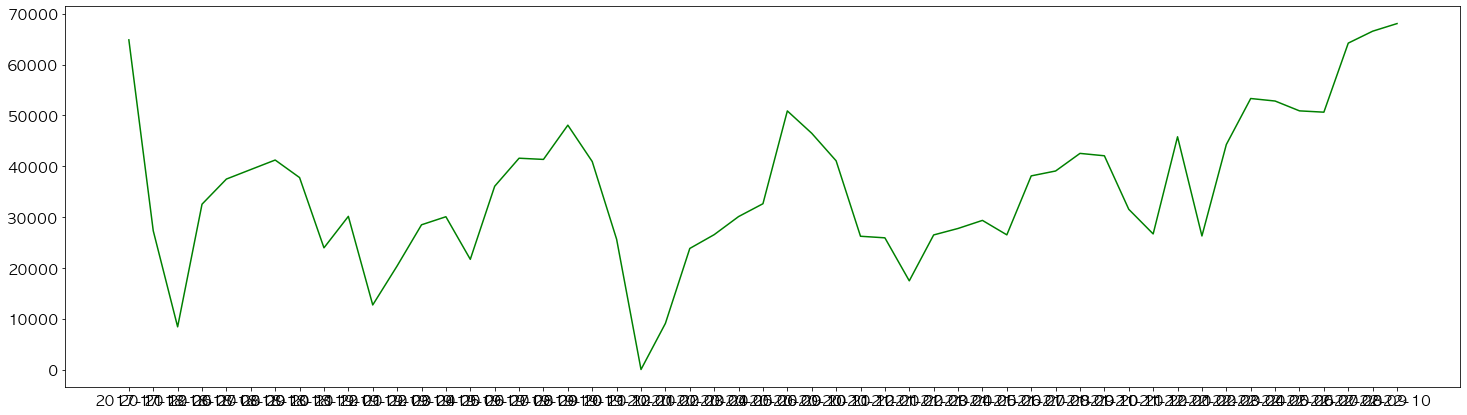

In [51]:
# 월별 거래 횟수
# 22년과 21년의 차이가 꽤 많이 난다
# 데이터를 마이닝한 부서에 문의해본 결과, 본인들은 API에서 수집만 하기 때문에 정확한 이유는 알 수 없다고 한다.
# 거래량 자체를 유의미한 지표로 사용하기엔 무리가 있어 보인다.
c.reset_index(inplace=True)
c['ym'] = c['reg_date'].dt.strftime('%Y-%m')
c.drop(columns=('reg_date'),inplace=True)
cc = c.groupby(c['ym']).sum()
cc.reset_index(inplace=True)
# 월별 거래량
plt.figure(figsize=(25,7))
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,200)) 
plt.plot(cc['ym'],cc['scale'],color='green')
plt.show()

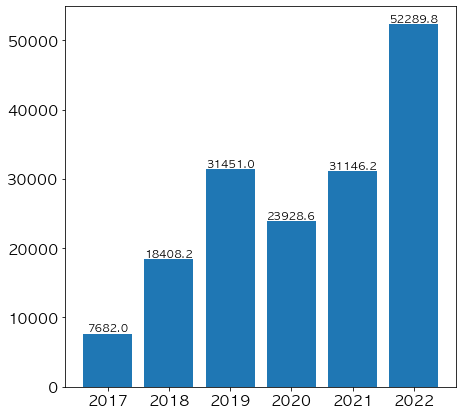

In [52]:
# 2021년과 2022년 평균 거래량 차이
y = df.groupby(['reg_date']).count()
y.reset_index(inplace=True)
y['ym'] = y['reg_date'].dt.strftime('%Y')
y.drop(columns=('reg_date'),inplace=True)
yy = y.groupby(y['ym']).sum()
yy.reset_index(inplace=True)
yy = yy[['ym','prd']]
#print(f"2021's average trades: {yy.iloc[0,1]/12}")
#print(f"2022's average trades: {yy.iloc[1,1]/6}")
#print(f"diff:{(yy.iloc[1,1]/6)-(yy.iloc[0,1]/12)}")
yy['diff'] = 0
yy.iloc[0,2] = yy.iloc[0,1]/12
yy.iloc[1,2] = yy.iloc[1,1]/12
yy.iloc[2,2] = yy.iloc[2,1]/12
yy.iloc[3,2] = yy.iloc[3,1]/12
yy.iloc[4,2] = yy.iloc[4,1]/12
yy.iloc[5,2] = yy.iloc[5,1]/10

plt.figure(figsize=(7,7))
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,200)) 
bar = plt.bar(yy['ym'],yy['diff'])#,color=['#aaa69d','#34ace0'])
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 11)

plt.show()

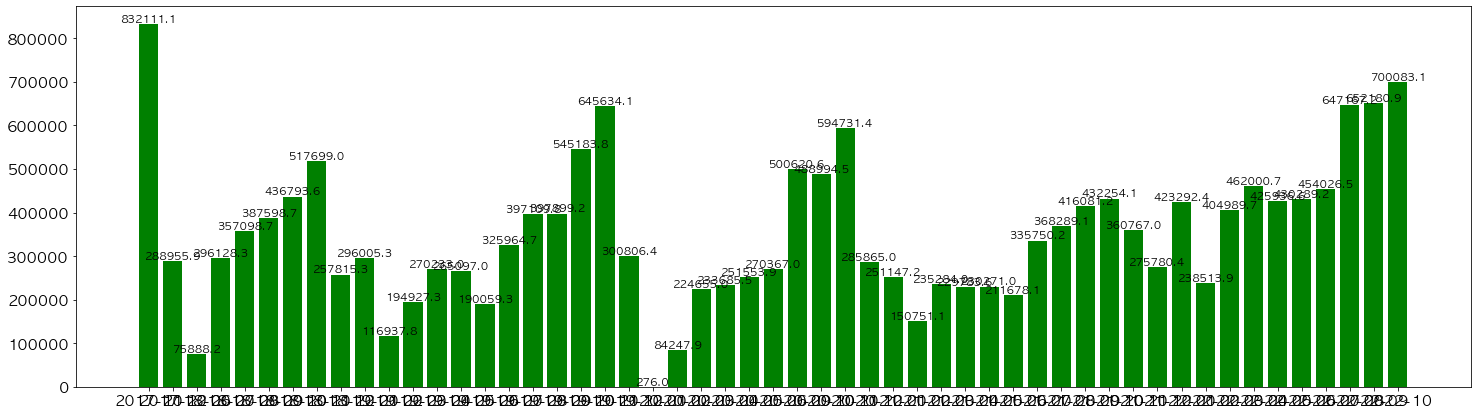

In [53]:
# 월별 총 거래량 탐색
dfm = df.groupby(['reg_date']).sum()[['scale','price']]
dfm.reset_index(inplace=True)
dfm['ym'] = dfm['reg_date'].dt.strftime('%Y-%m')
dfm.drop(columns=('reg_date'),inplace=True)
bb = dfm.groupby(dfm['ym']).sum()
bb.reset_index(inplace=True)
# 월별 거래량
plt.figure(figsize=(25,7))
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,200)) 
bar = plt.bar(bb['ym'],bb['scale'],color='green')
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 11)

plt.show()

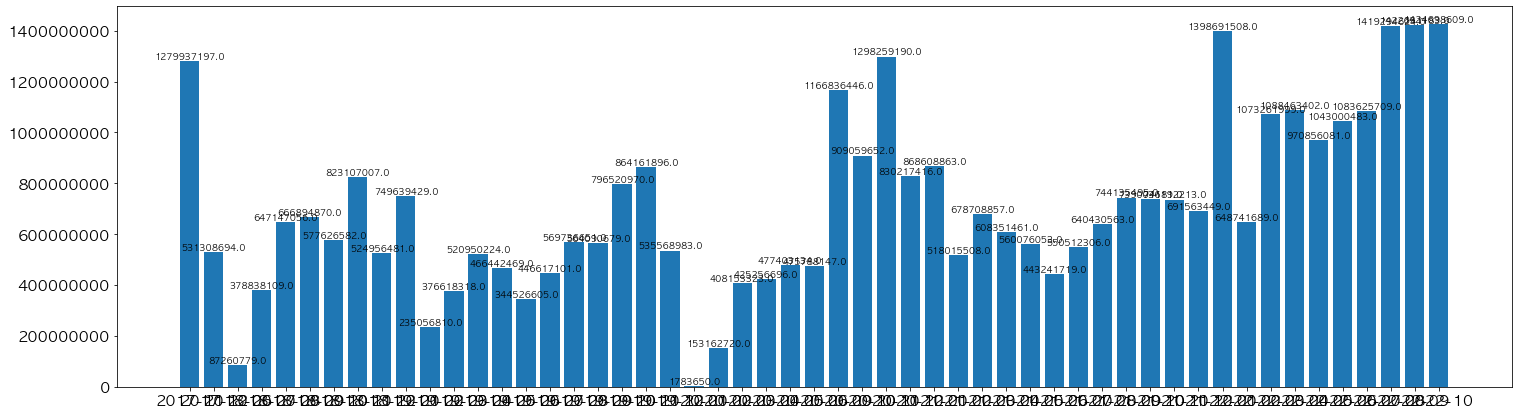

In [54]:
# 월별 총 거래 가격 탐색
plt.figure(figsize=(25,7))
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,11)) 
bar = plt.bar(bb['ym'],bb['price'])
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 9)
plt.show()

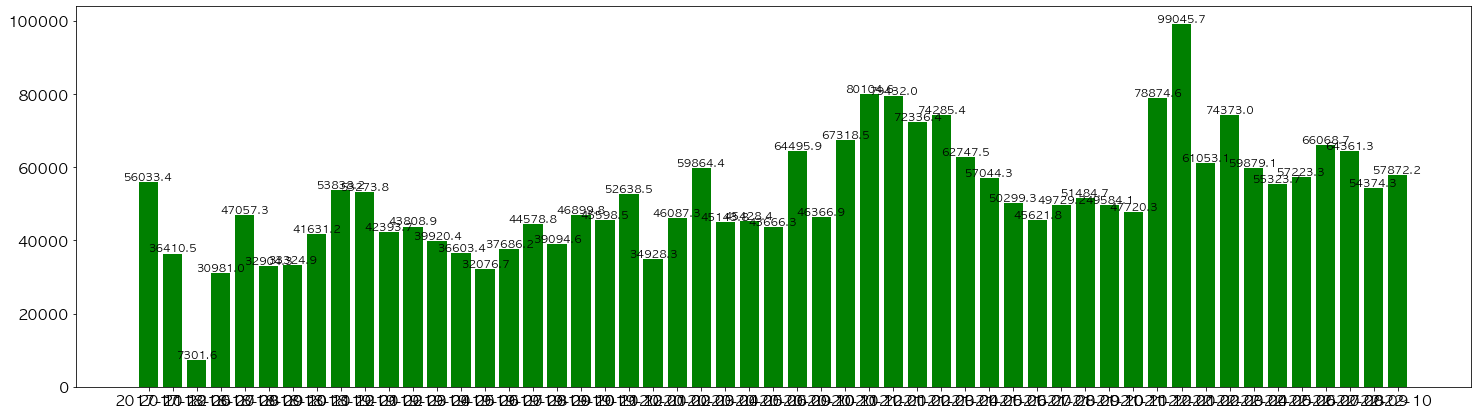

In [55]:
# 월별 평균 kg당 거래 가격 탐색
# 올해 1월 특히 변동이 크고, 전반적으로 1분기 때 가격이 가장 높음
dfm2 = df.groupby(['reg_date']).mean()[['price_kg','price']]
dfm2.reset_index(inplace=True)
dfm2['ym'] = dfm2['reg_date'].dt.strftime('%Y-%m')
dfm2.drop(columns=('reg_date'),inplace=True)
bb2 = dfm2.groupby(dfm['ym']).sum()
bb2.reset_index(inplace=True)
# 월별 거래량
plt.figure(figsize=(25,7))
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,200)) 
bar = plt.bar(bb2['ym'],bb2['price_kg'],color='green')
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 11)

plt.show()

In [56]:
# 주간 평균 판매량
def week_check(date):
    return date.weekday()
df2 = df['reg_date'].to_frame()
df2['week'] = df2['reg_date'].apply(week_check)

In [57]:
df2

,reg_date,week
280,2017-11-01,2
282,2017-11-01,2
284,2017-11-01,2
286,2017-11-01,2
288,2017-11-01,2
...,...,...
28135025,2020-10-30,4
28135058,2020-11-11,2
28135062,2020-11-12,3
28135660,2021-05-19,2


In [58]:
# 요일별 분포
week = ['월','화','수','목','금','토','일']
aa = df2['week'].value_counts().to_frame()
aa.reset_index(inplace=True)
aa.rename(columns={'index':'day', 'week':'count'},inplace=True)
for i in range(len(week)):
    aa.loc[aa["day"]==i,"day"] = week[i]

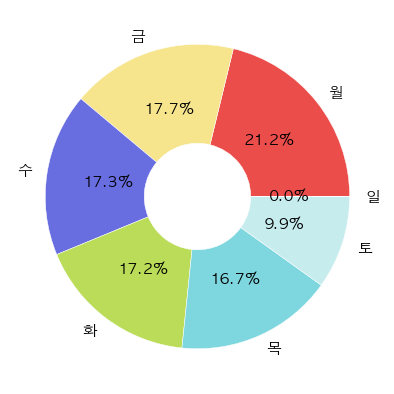

In [59]:
# 요일별 분포 시각화
# 전반적으로 비슷하나, 월요일에 조금 더 거래가 많다
plt.figure(figsize=(7,7),facecolor='white')
wedgeprops={'width': 0.65, 'edgecolor': 'w', 'linewidth': 0.5}
plt.rc('font', size=15) 
colors = ['#eb4d4b','#f6e58d','#686de0','#badc58','#7ed6df','#c7ecee']
plt.pie(aa['count'],labels=aa['day'],autopct='%.1f%%',wedgeprops=wedgeprops,colors=colors)
plt.show()

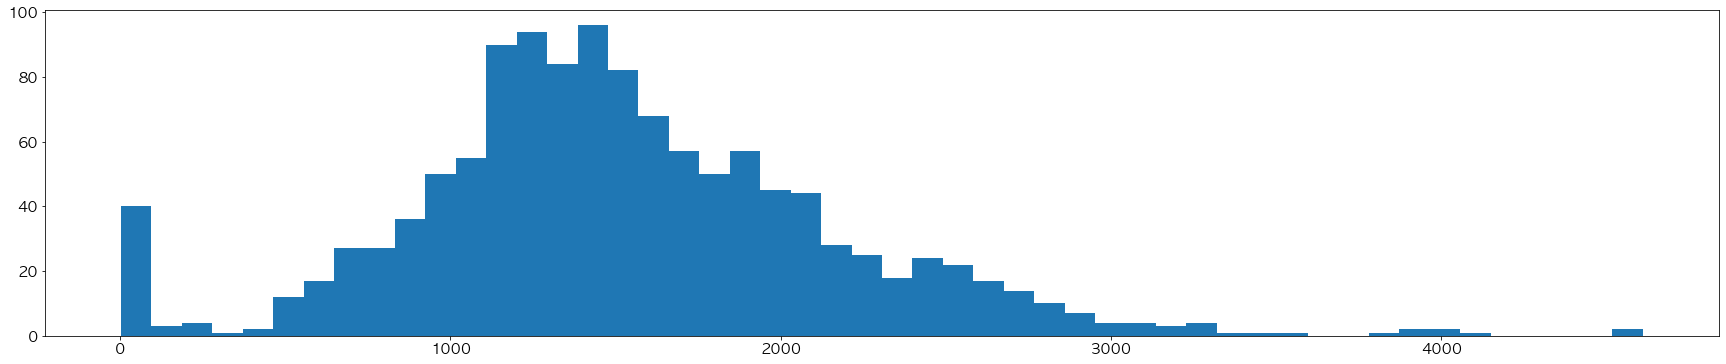

In [60]:
# 일자별 데이터 분포
# 평균적으로 15000~25000 건 사이의 거래가 이루어짐
plt.figure(figsize=(30,6))
plt.hist(c['prd'],bins=50)
plt.show()

### 연속형 데이터 탐색 (Scale,Price,New_class,Price_kg)

In [61]:
# 대략적인 데이터 정보
df.describe()

,scale,price,new_class,price_kg
count,1874289.00000,1874289.00000,1874289.00000,1874289.00000
mean,9.95965,19999.61225,1.26400,2178.05772
std,51.62606,40023.29789,0.88270,2100.02112
min,0.10000,500.00000,1.00000,14.29000
25%,5.00000,6500.00000,1.00000,900.00000
50%,10.00000,13000.00000,1.00000,1575.00000
75%,10.00000,25000.00000,1.00000,2700.00000
max,10000.00000,11300000.00000,9.00000,98400.00000


In [62]:
# scale TOP 10
df.sort_values('scale', ascending=False).head(10)

,prd,scale,price,eco,reg_date,new_class,price_kg,state,city
9768701,무,10000.00000,4330000,normal,2020-11-13,1,433.00000,경기,평택
14286921,무,10000.00000,4140000,normal,2021-11-19,1,414.00000,경기,평택
21880638,무,10000.00000,4180000,normal,2022-10-06,1,418.00000,강원,홍천
9936348,무,10000.00000,6350000,normal,2020-11-27,1,635.00000,광주,광주
9796934,무,10000.00000,5140000,normal,2020-11-16,1,514.00000,광주,광주
9796941,무,10000.00000,4170000,normal,2020-11-16,1,417.00000,경기,평택
9880391,무,10000.00000,5370000,normal,2020-11-23,1,537.00000,광주,광주
10054866,무,10000.00000,4200000,normal,2020-12-08,1,420.00000,광주,광주
9866119,무,10000.00000,3940000,normal,2020-11-21,1,394.00000,경기,평택
9726194,무,10000.00000,3550000,normal,2020-11-10,1,355.00000,경기,평택


In [63]:
# price TOP 10
df.sort_values('price', ascending=False).head(10)

,prd,scale,price,eco,reg_date,new_class,price_kg,state,city
5001335,무,6000.00000,11300000,normal,2019-12-07,1,1883.33000,광주,광주
4910414,무,6000.00000,10020000,normal,2019-12-16,1,1670.00000,광주,광주
9768700,무,10000.00000,7460000,normal,2020-11-13,1,746.00000,광주,광주
2732131,무,6000.00000,7000000,normal,2018-11-14,1,1166.67000,경기,광주
5020069,무,6000.00000,6800000,normal,2019-12-05,1,1133.33000,광주,광주
5263071,무,6000.00000,6590000,normal,2019-11-14,1,1098.33000,경기,화성
2746182,무,6000.00000,6500000,normal,2018-11-15,1,1083.33000,광주,광주
443023,무,8000.00000,6400000,normal,2017-11-17,1,800.00000,광주,광주
9936348,무,10000.00000,6350000,normal,2020-11-27,1,635.00000,광주,광주
5252468,무,6000.00000,6320000,normal,2019-11-15,1,1053.33000,경기,화성


In [64]:
# price_kg TOP 10
df.sort_values('price_kg', ascending=False).head(10)

,prd,scale,price,eco,reg_date,new_class,price_kg,state,city
15888075,배추,4.00000,393600,normal,2022-02-22,1,98400.00000,경기,포천
19680911,무,20.00000,1950000,normal,2022-07-15,1,97500.00000,경기,여주
19020866,배추,8.00000,777700,normal,2022-06-22,1,97212.50000,강원,홍천
25038306,배추,8.00000,777700,normal,2022-07-02,2,97212.50000,강원,홍천
9158083,배추,10.00000,952250,normal,2020-09-26,1,95225.00000,강원,태백
8912906,무,8.00000,759000,normal,2020-09-10,1,94875.00000,경기,포천
18180463,배추,8.00000,757900,normal,2022-05-23,1,94737.50000,경기,포천
11278748,미나리,4.00000,370000,normal,2021-03-26,1,92500.00000,경남,밀양
10397581,미나리,4.00000,370000,normal,2021-01-09,1,92500.00000,경남,밀양
24581717,사과,10.00000,916000,certified,2022-02-25,2,91600.00000,경북,청송


In [65]:
# class 분포
class_count = df.groupby(['new_class']).count()
class_count['percent'] = class_count['prd']/len(df)
class_count[['prd','percent']]

,prd,percent
new_class,,
1,1581940,0.84402
2,193719,0.10336
3,78053,0.04164
4,899,0.00048
5,3643,0.00194
6,127,0.00007
7,83,0.00004
8,18,0.00001
9,15807,0.00843


### prd

In [67]:
# 물품별 거래 수 TOP 10
prd_sold = df.groupby(['prd']).count().reset_index()
prd_sold = prd_sold[['prd','scale']]
prd_sold.rename(columns={'scale':'count'},inplace=True)
prd_sold.sort_values('count', ascending=False).head(10)

,prd,count
6,배추,485290
7,사과,467044
3,무,367743
5,배,206595
4,미나리,118750
0,갓,64551
9,양파,63418
2,마늘,41646
1,굴,38653
8,생강,13180


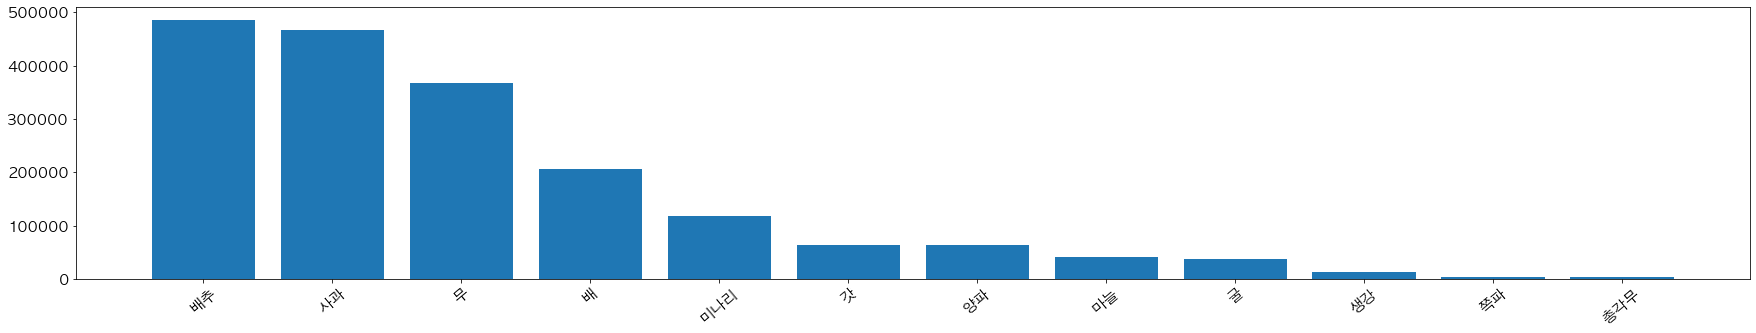

Product 종류 수: 12
Product 최대 거래 횟수: 485290
Product 최소 거래 횟수: 3637


In [68]:
# 하스토그램을 이용해 Store를 시각화하여 품목들의 거래 횟수 분포 확인
plt.figure(figsize=(30,5))
plt.bar(prd_sold.sort_values('count',ascending=False).head(50)['prd'], prd_sold.sort_values('count',ascending=False).head(50)['count'])
plt.xticks(rotation=40)
plt.show()

# 명확한 숫자를 확인하기 위해 수치를 출력
print(f"Product 종류 수: {len(df['prd'].unique())}")
print(f"Product 최대 거래 횟수: {df['prd'].value_counts().max()}")
print(f"Product 최소 거래 횟수: {df['prd'].value_counts().min()}")

### eco

종류 수: 7


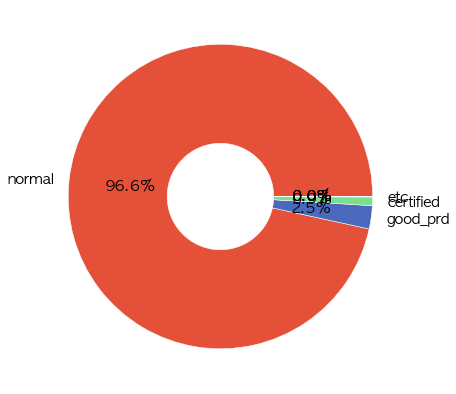

In [73]:
# 종류 수
print(f"종류 수: {len(df['eco'].unique())}")
df_eco = df['eco'].value_counts().to_frame()
df_eco.reset_index(inplace=True)
df_eco = df_eco.rename(columns={'eco':'count','index':'eco'})

df_eco
plt.figure(figsize=(7,7),facecolor='white')
wedgeprops={'width': 0.65, 'edgecolor': 'w', 'linewidth': 0.5}
plt.rc('font', size=15)
labels = ['normal', 'good_prd', 'certified', 'etc','','','']
colors = ['#e55039','#4a69bd','#78e08f','#fa983a','#7ed6df','#c7ecee']
plt.pie(df_eco['count'],labels=labels,autopct='%.1f%%',wedgeprops=wedgeprops,colors=colors)
plt.show()

In [74]:
# 각 종류 별 평균 거래량, 판매량, 판매 가격
cnts = df.groupby(['eco']).count()['prd']
avg = df.groupby(['eco']).mean()
display('count')
display(cnts)
display('average')
display(avg)

'count'

eco
certified        17064
ecofriendly        756
good_prd         46069
ing                  7
low                  2
normal         1810265
organic            126
Name: prd, dtype: int64

'average'

,scale,price,new_class,price_kg
eco,,,,
certified,9.61813,27309.31851,1.25879,3056.45395
ecofriendly,4.37831,6811.70635,1.03307,1606.52116
good_prd,13.04551,31855.75296,1.22412,2525.33411
ing,7.11429,17414.28571,3.28571,2929.25143
low,10.00000,18250.00000,1.00000,1825.00000
normal,9.88677,19634.48788,1.26517,2161.12551
organic,8.62540,20238.88889,1.03175,2905.67460


### state

종류 수: 13


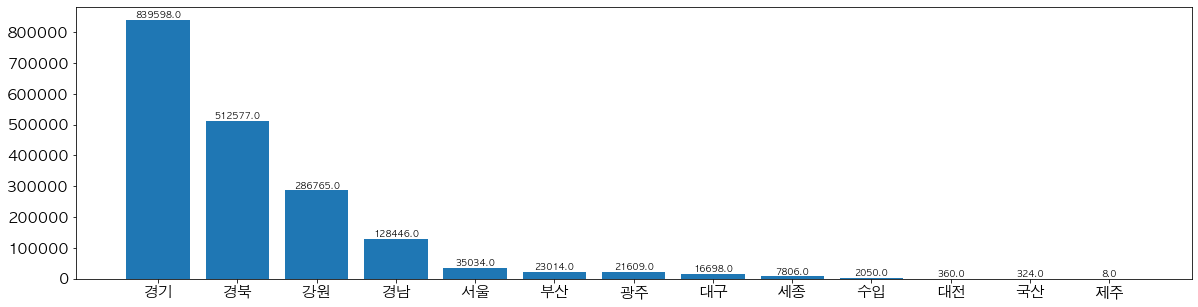

In [75]:
# 종류 수 (국내 한정, 해외는 모두 수입으로 통일)
print(f"종류 수: {len(df['state'].unique())}")
df_state = df['state'].value_counts().to_frame()
df_state.reset_index(inplace=True)
df_state = df_state.rename(columns={'state':'count','index':'state'})
plt.figure(figsize=(20,5))
bar = plt.bar(df_state.sort_values('count',ascending=False)['state'], df_state.sort_values('count',ascending=False)['count'])
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 9)
plt.show()

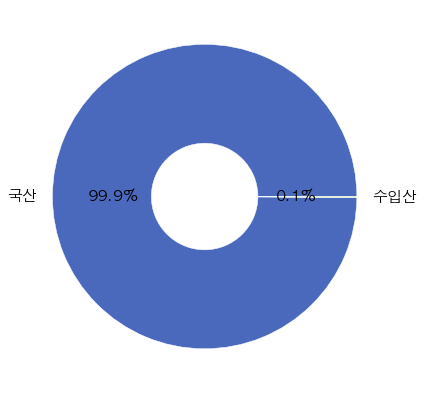

In [76]:
# 국산 / 수입 비율, 국산이 압도적으로 높음

a = len(df[df['state']!='수입'])
b = len(df[df['state']=='수입'])

plt.figure(figsize=(7,7),facecolor='white')
wedgeprops={'width': 0.65, 'edgecolor': 'w', 'linewidth': 0.5}
plt.rc('font', size=15) 
plt.pie([a,b],labels=['국산','수입산'],autopct='%.1f%%',wedgeprops=wedgeprops,colors=['#4a69bd','#b8e994'])
plt.show()

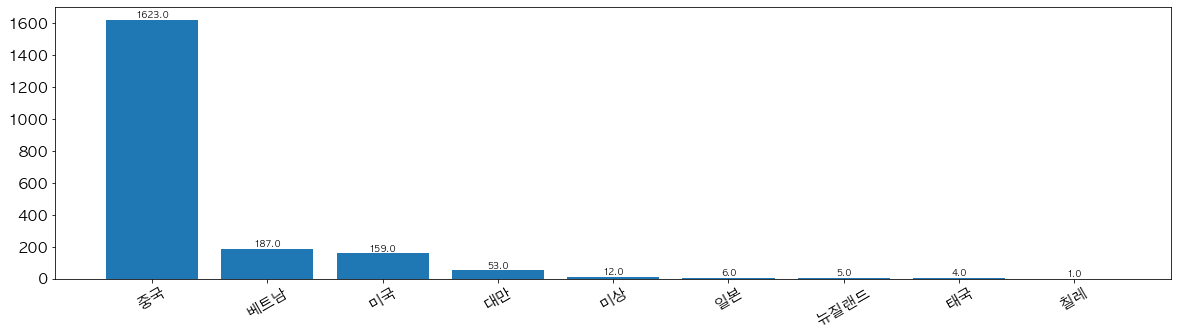

In [77]:
# 수입의 경우 원산지 비교
df_foreign1 = df[df['state']=='수입']
df_foreign2 = df_foreign1['city'].value_counts().to_frame()
df_foreign2.reset_index(inplace=True)
df_foreign2 = df_foreign2.rename(columns={'index':'city','city':'count'})

plt.figure(figsize=(20,5))
bar = plt.bar(df_foreign2.sort_values('count',ascending=False).head(20)['city'], df_foreign2.sort_values('count',ascending=False).head(20)['count'])
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 9)
plt.xticks(rotation=30)
plt.show()

### city

종류 수: 97


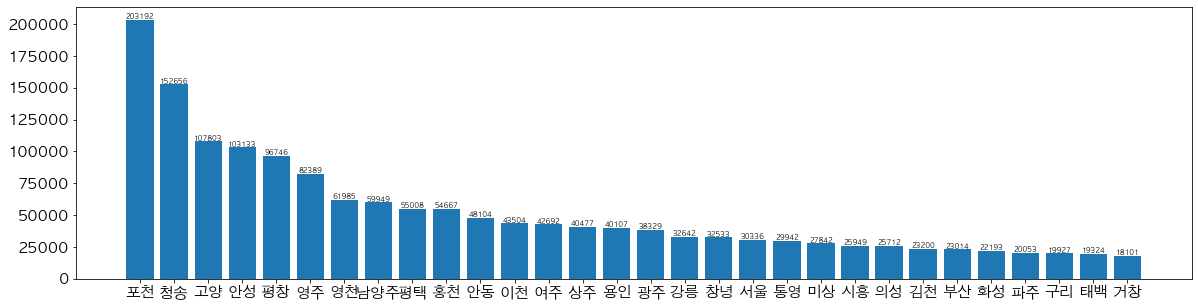

In [78]:
# 종류 별 거래 수 (국내)
df_locals = df[df['state']!='수입']
print(f"종류 수: {len(df_locals['city'].unique())}")
df_local = df_locals['city'].value_counts().to_frame()
df_local.reset_index(inplace=True)
df_local = df_local.rename(columns={'city':'count','index':'city'})
plt.figure(figsize=(20,5))
plt.title = 'TOP 30 local'
bar = plt.bar(df_local.sort_values('count',ascending=False).head(30)['city'], df_local.sort_values('count',ascending=False).head(30)['count'])
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.0f' % height, ha='center', va='bottom', size = 7)
plt.show()

## 복합적 분석

### 상승세
- 가격이 오른 품목들 탐색
- price_kg로 비교

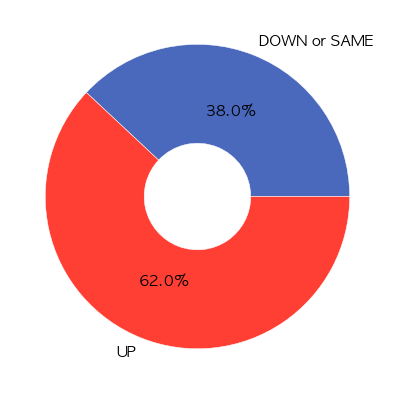

In [46]:
rise = df.groupby(['prd','reg_date']).mean()
rise.reset_index(inplace=True)
rise['ym'] = rise['reg_date'].dt.to_period('Y')
rise_ym = rise.groupby(['prd','ym']).mean()
rise_ym.reset_index(inplace=True)
rise_ym['rise'] = False
rise_ym['diff'] = 0

for idx, row in rise_ym.iterrows():
    if idx+1 == len(rise_ym):
        break
    a = rise_ym.iloc[idx]
    b = rise_ym.iloc[idx+1]
    if a['prd'] == b['prd'] and a['price_kg'] < b['price_kg']:
        rise_ym.iloc[idx,6] = True
        rise_ym.iloc[idx+1,6] = True
        rise_ym.iloc[idx+1,7] = b['price_kg']-a['price_kg']

rise_percent = rise_ym.groupby('rise').count()['prd']
plt.figure(figsize=(7,7),facecolor='white')
wedgeprops={'width': 0.65, 'edgecolor': 'w', 'linewidth': 0.5}
plt.rc('font', size=15) 
plt.pie(rise_percent,labels=['DOWN or SAME','UP'],autopct='%.1f%%',wedgeprops=wedgeprops,colors=['#4a69bd','#ff3f34'])
plt.show()
    

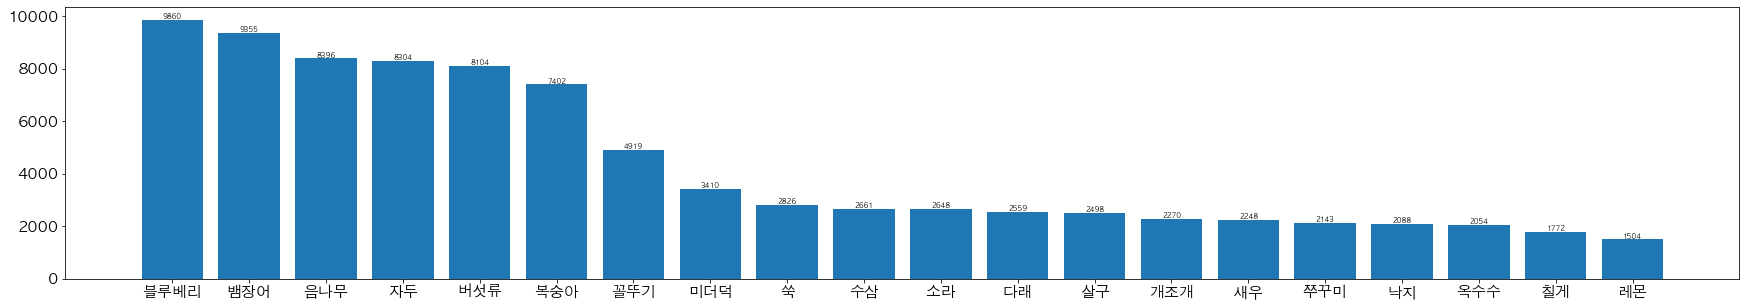

In [47]:
# 상승폭이 큰 물품 TOP 20

plt.figure(figsize=(30,5))
bar = plt.bar(rise_ym.sort_values('diff',ascending=False).head(20)['prd'], rise_ym.sort_values('diff',ascending=False).head(20)['diff'])
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.0f' % height, ha='center', va='bottom', size = 7)
plt.show()

/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_9218/1948797309.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  berry['ym'] = berry['reg_date'].dt.to_period('M')


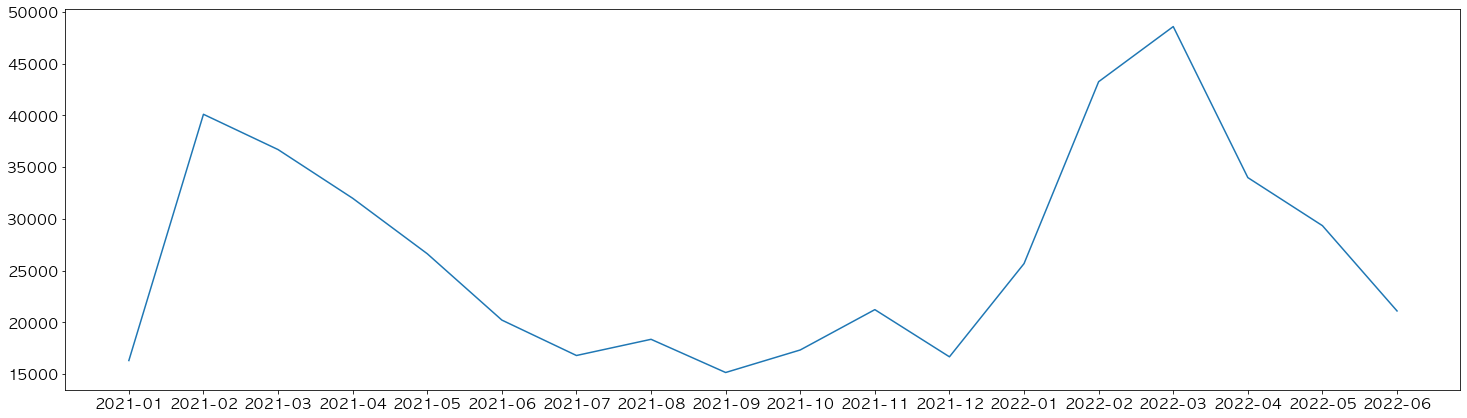

In [48]:
# 가장 변동이 컸던 블루베리의 가격 변동
berry = df[df['prd']=='블루베리']
berry['ym'] = berry['reg_date'].dt.to_period('M')
berry_m = berry.groupby('ym').mean()
berry_m.reset_index(inplace=True)
berry_m['ym'] = berry_m['ym'].astype(str)

plt.figure(figsize=(25,7))
plt.plot(berry_m['ym'],berry_m['price_kg'])
plt.show()

In [49]:
# 거래량도 많은 것을 볼 수 있음
len(df[df['prd']=='블루베리'])

64970

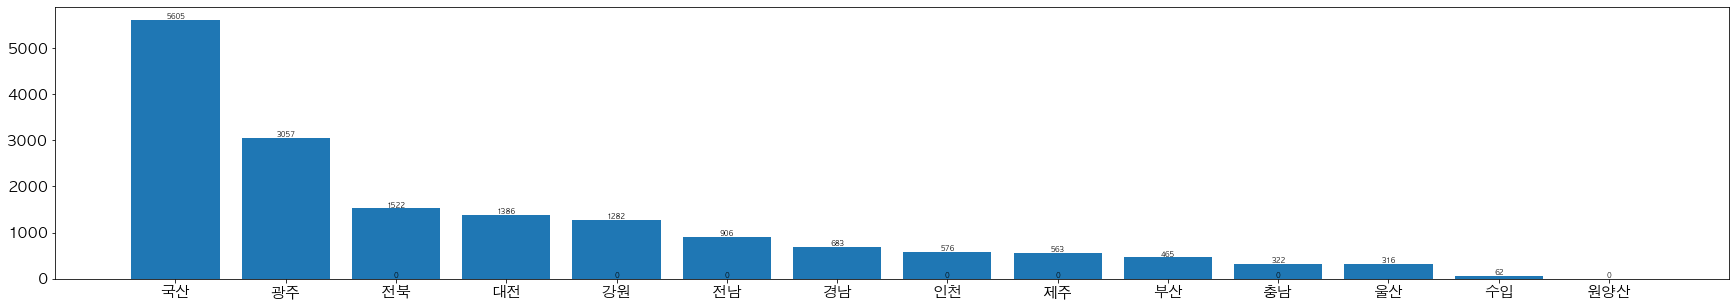

In [50]:
# 상승폭이 가장 큰 구역
# 생각 외로 수입산은 큰 변화 없음
rise2 = df.groupby(['state','reg_date']).mean()
rise2.reset_index(inplace=True)
rise2['ym'] = rise2['reg_date'].dt.to_period('Y')
rise_ym2 = rise2.groupby(['state','ym']).mean()
rise_ym2.reset_index(inplace=True)
rise_ym2['rise'] = False
rise_ym2['diff'] = 0

for idx, row in rise_ym2.iterrows():
    if idx+1 == len(rise_ym2):
        break
    a = rise_ym2.iloc[idx]
    b = rise_ym2.iloc[idx+1]
    if a['state'] == b['state'] and a['price_kg'] < b['price_kg']:
        rise_ym2.iloc[idx,6] = True
        rise_ym2.iloc[idx+1,6] = True
        rise_ym2.iloc[idx+1,7] = b['price_kg']-a['price_kg']

plt.figure(figsize=(30,5))
bar = plt.bar(rise_ym2.sort_values('diff',ascending=False).head(20)['state'], rise_ym2.sort_values('diff',ascending=False).head(20)['diff'])
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.0f' % height, ha='center', va='bottom', size = 7)
plt.show()

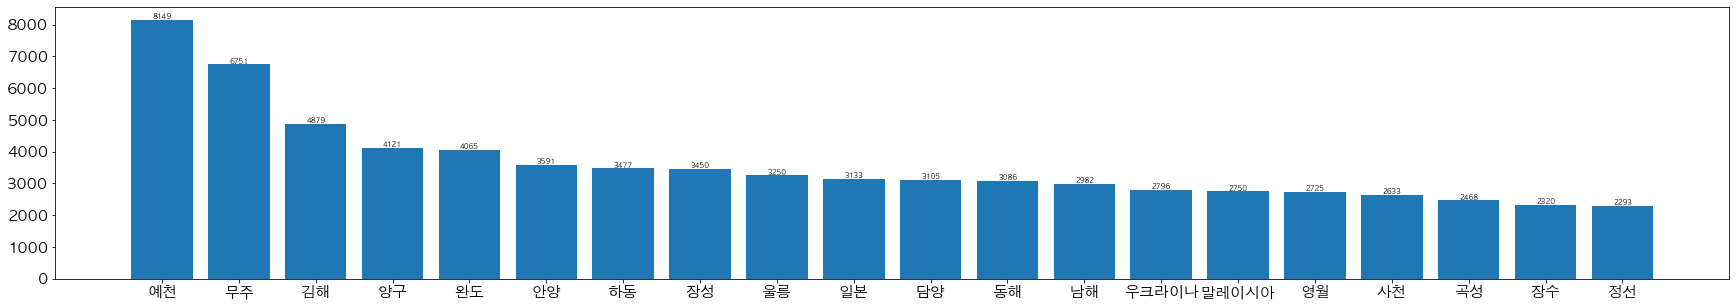

In [51]:
# 상승폭이 가장 큰 지역
rise3 = df.groupby(['city','reg_date']).mean()
rise3.reset_index(inplace=True)
rise3['ym'] = rise3['reg_date'].dt.to_period('Y')
rise_ym3 = rise3.groupby(['city','ym']).mean()
rise_ym3.reset_index(inplace=True)
rise_ym3['rise'] = False
rise_ym3['diff'] = 0

for idx, row in rise_ym3.iterrows():
    if idx+1 == len(rise_ym3):
        break
    a = rise_ym3.iloc[idx]
    b = rise_ym3.iloc[idx+1]
    if a['city'] == b['city'] and a['price_kg'] < b['price_kg']:
        rise_ym3.iloc[idx,6] = True
        rise_ym3.iloc[idx+1,6] = True
        rise_ym3.iloc[idx+1,7] = b['price_kg']-a['price_kg']

plt.figure(figsize=(30,5))
bar = plt.bar(rise_ym3.sort_values('diff',ascending=False).head(20)['city'], rise_ym3.sort_values('diff',ascending=False).head(20)['diff'])
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.0f' % height, ha='center', va='bottom', size = 7)
plt.show()


### 도시별 특산물

In [52]:
# 도시별 TOP 1 생산품
aa = df.groupby(['city','prd']).sum()
aa.reset_index(inplace=True)
aa['rank'] = aa.groupby('city')['price_kg'].rank(method='max',ascending=False)
qq = aa[aa['rank']==1][['city','prd']]
qq.reset_index(inplace=True,drop=True)

for idx, row in qq.iterrows():
    if idx%7 != 0:
        print(f"{qq.iloc[idx,0]} : {qq.iloc[idx,1]} / ", end=' ')
    else:
        print(f"{qq.iloc[idx,0]} : {qq.iloc[idx,1]}")

가평 : 버섯
강릉 : 사과 /  강진 : 버섯 /  강화 : 버섯 /  거제 : 호박 /  거창 : 딸기 /  경산 : 복숭아 /  경주 : 부추
계룡 : 상추 /  고령 : 딸기 /  고성 : 딸기 /  고양 : 양채류 /  고창 : 두릅 /  고흥 : 오이 /  곡성 : 블루베리
공주 : 딸기 /  과천 : 배 /  과테말라 : 바나나 /  광명 : 양채류 /  광양 : 토마토 /  광주 : 딸기 /  괴산 : 버섯
구례 : 오이 /  구리 : 양채류 /  구미 : 메론 /  군산 : 갑오징어 /  군위 : 자두 /  그리스 : 키위 /  금산 : 깻잎
김제 : 복숭아 /  김천 : 포도 /  김포 : 미나리 /  김해 : 딸기 /  나주 : 메론 /  남아공 : 자몽 /  남양주 : 양채류
남원 : 복숭아 /  남해 : 두릅 /  네덜란드 : 고등어 /  노르웨이 : 고등어 /  논산 : 딸기 /  뉴질랜드 : 호박 /  뉴칼레도니아 : 호박
단양 : 사과 /  담양 : 딸기 /  당진 : 버섯 /  대구 : 깻잎 /  대만 : 망고 /  대전 : 포도 /  동두천 : 열무
동해 : 버섯 /  러시아 : 명태 /  마산 : 토마토 /  말레이시아 : 새우 /  멕시코 : 아보카도 /  모로코 : 갈치 /  목포 : 시금치
무안 : 버섯 /  무주 : 사과 /  문경 : 오이 /  미국 : 오렌지 /  미상 : 포도 /  밀양 : 깻잎 /  바레인 : 게
베트남 : 새우 /  보령 : 버섯 /  보성 : 두릅 /  보은 : 버섯 /  봉화 : 사과 /  부산 : 토마토 /  부안 : 딸기
부여 : 버섯 /  부천 : 미나리 /  불가리아 : 과채류 /  브라질 : 망고 /  사우디아라비아 : 새우 /  사천 : 바지락 /  산청 : 딸기
삼척 : 배추 /  상주 : 포도 /  서산 : 달래 /  서울 : 양채류 /  서천 : 깻잎 /  성남 : 양채류 /  성주 : 참외
세네갈 : 갈치 /  세종 : 오이 /  속초 : 토마토 /  수원 : 배 /  순창

In [59]:
# 최종 파일 저장
df.to_csv('final_data.csv')